In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from matplotlib import dates as mpl_dates

In [2]:
data=pd.read_excel('Sample - Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data1=data.copy()
data1['Order ID']=data1['Order ID'].drop_duplicates()#去掉重复的订单id
data1['Order ID'].count()

5009

In [4]:
data['Order ID'].count()

9994

In [5]:
data1.dropna(subset=['Order ID'],inplace=True)
len(data1['Order ID'])#去掉重复的订单ID后，有空值，去掉有空值的那一列

5009

In [6]:
data1['Num']=1
data1.head()
#设置一个新列用于计数

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Num
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1
5,6,CA-2016-115812,2016-06-09,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,1
12,13,CA-2019-114412,2019-04-15,2019-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,1


In [7]:
data1.set_index('Order Date',drop=True,append=False,inplace=True)
data1.head()#设置order date为索引

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Num
Order Date,,,,,,,,,,,,,,,,,,,,,
2018-11-08,1,CA-2018-152156,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,1
2018-06-12,3,CA-2018-138688,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,1
2017-10-11,4,US-2017-108966,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,1
2016-06-09,6,CA-2016-115812,2016-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,1
2019-04-15,13,CA-2019-114412,2019-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,1


In [9]:
data2=data1['Num'].resample('M').sum()
print(data2)#将data1重新采样按照月来分类聚合，data['num']是不重复订单数的统计总和

Order Date
2016-01-31     32
2016-02-29     28
2016-03-31     71
2016-04-30     66
2016-05-31     69
2016-06-30     66
2016-07-31     65
2016-08-31     72
2016-09-30    130
2016-10-31     78
2016-11-30    151
2016-12-31    141
2017-01-31     29
2017-02-28     36
2017-03-31     79
2017-04-30     72
2017-05-31     74
2017-06-30     68
2017-07-31     66
2017-08-31     68
2017-09-30    140
2017-10-31     87
2017-11-30    158
2017-12-31    161
2018-01-31     48
2018-02-28     45
2018-03-31     86
2018-04-30     89
2018-05-31    108
2018-06-30     97
2018-07-31     96
2018-08-31     90
2018-09-30    192
2018-10-31    105
2018-11-30    183
2018-12-31    176
2019-01-31     69
2019-02-28     53
2019-03-31    118
2019-04-30    116
2019-05-31    118
2019-06-30    133
2019-07-31    111
2019-08-31    111
2019-09-30    226
2019-10-31    147
2019-11-30    261
2019-12-31    224
Freq: M, Name: Num, dtype: int64


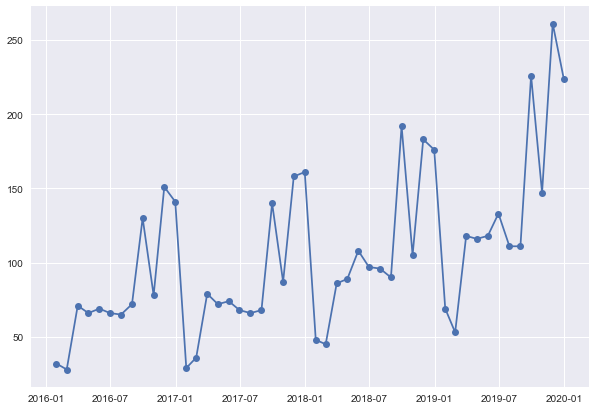

In [17]:
from matplotlib import pyplot as plt
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif'] = ['simHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn')
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
plt.plot_date(data2.index,data2,linestyle='solid')
# plt.title('每月不重复订单数',color='blue')
# plt.xlabel('订单数量')
# plt.ylabel('Date')

准备画图3：快递发货状态统计图

In [19]:
data['diff_time']=data['Ship Date']-data['Order Date']
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,diff_time
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [21]:
data['diff_time_int']=data['diff_time'].dt.days
data.head()
#将different day从时间字段转成整数

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,diff_time,diff_time_int
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,3
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,3
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,4
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,7
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,7


In [24]:
def ship_status(x1,x2):
    if x1==0:
        if x2=='Same Day':
            y='Shipped On Time'
        else:
            y='Shipped Early'
    elif x1==1:
        if x2=='Same Day':
            y='Shipped Late'
        elif x2=='First Class':
            y='Shipped On Time'
        else:
            y='Shipped Early'
    elif x1<=3:
        if x2=='Same Day' or x2=='First Class':
            y='Shipped Late'
        elif x2=='Second Class':
            y='Shipped On Time'
        else:
            y='Shipped Early'
    elif x1<=6:
        if x2!='Standard Class':
            y='Shipped Late'
        else: 
            y='Shipped On Time'
    else:
         y='Shipped Late'
    return y
   

In [25]:
data['发货状态']=data.apply(lambda x: ship_status(x['diff_time_int'],x['Ship Mode']),axis=1)

In [27]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,diff_time,diff_time_int,发货状态
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,3,Shipped On Time
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,3,Shipped On Time
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,4,Shipped Late
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,7,Shipped Late
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,7,Shipped Late


In [28]:
data3=data.groupby(['Ship Mode','发货状态']).count()
data4=data3['Order ID']
data4
#用groupby和count的方式将df以ship mode, 发货状态分成几个部分，取出order id的部分

Ship Mode       发货状态           
First Class     Shipped Late       1194
                Shipped On Time     344
Same Day        Shipped Late         24
                Shipped On Time     519
Second Class    Shipped Early         1
                Shipped Late        800
                Shipped On Time    1144
Standard Class  Shipped Early         3
                Shipped Late        622
                Shipped On Time    5343
Name: Order ID, dtype: int64

In [29]:
data4=data4.unstack()
#用unstack()函数将二级索引发货方式变成列

In [30]:
data4=data4.fillna(0)
data4

发货状态,Shipped Early,Shipped Late,Shipped On Time
Ship Mode,,,
First Class,0.0,1194.0,344.0
Same Day,0.0,24.0,519.0
Second Class,1.0,800.0,1144.0
Standard Class,3.0,622.0,5343.0


In [33]:
data5= data4.rename_axis(columns=None)
data5=data4.reset_index()
data5
#将重命名列

发货状态,Ship Mode,Shipped Early,Shipped Late,Shipped On Time
0,First Class,0.0,1194.0,344.0
1,Same Day,0.0,24.0,519.0
2,Second Class,1.0,800.0,1144.0
3,Standard Class,3.0,622.0,5343.0


In [36]:
data5.set_index('Ship Mode',drop=True,append=False,inplace=True)
data5

发货状态,Shipped Early,Shipped Late,Shipped On Time
Ship Mode,,,
First Class,0.0,1194.0,344.0
Same Day,0.0,24.0,519.0
Second Class,1.0,800.0,1144.0
Standard Class,3.0,622.0,5343.0


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='发货状态', ylabel='Ship Mode'>

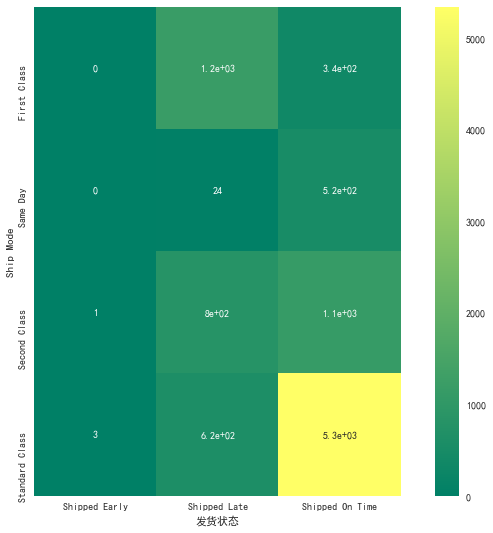

In [58]:
import pylab as mpl
#准备画第三个图，热力图更适合
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
fig, ax=plt.subplots(figsize=(12,9))
sns.heatmap(data5,annot=True,xticklabels=True,yticklabels=True,square=True,cmap='summer')

In [95]:
#准备画第四个图‘不同类别产品的不重复订单数’
data6=data.groupby(['Category'])
furniture=data6.get_group('Furniture')
furniture=furniture.groupby('Order ID').count()
print(len(furniture.index))
off_supply=data6.get_group('Office Supplies')
off_supply=off_supply.groupby('Order ID').count()
print(len(off_supply.index))
tech=data6.get_group('Technology')
tech=tech.groupby('Order ID').count()
print(len(tech.index))


1764
3742
1544


In [96]:
category=['Furniture','Office Supplies','Technology']
order_num=[len(furniture.index),len(off_supply.index),len(tech.index)]

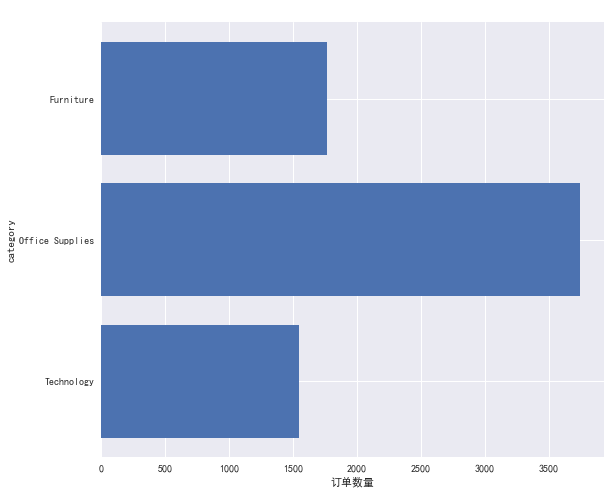

In [98]:
plt.figure(figsize=(9,8))
category.reverse()
order_num.reverse()
#plt.bar(lang,popularity)
plt.barh(category,order_num)
plt.xlabel('订单数量')
plt.ylabel('category')
plt.title('不同类别产品的不重复订单数量')
plt.show()

对于作业要求的第二个地图，我觉得用TABLEAU画最简单，就不展示python代码了